In [6]:
import pandas as pd
df = pd.read_csv("UP_2022.csv")

df['% of Votes'] = df['% of Votes'].str.rstrip('%').astype(float)

df['Total Votes'] = df['Total Votes'].str.replace(',','').astype(int)

print(df.dtypes)


ac_no            int64
Candidate       object
Party           object
% of Votes     float64
Total Votes      int32
Unnamed: 5     float64
Unnamed: 6     float64
dtype: object


In [21]:

df.drop(columns=['Unnamed: 5'], inplace=True)
df.drop(columns=['Unnamed: 6'], inplace=True)

KeyError: "['Unnamed: 5'] not found in axis"

In [10]:
df['Party'] = df['Party'].str.replace(r'\s*\([^()]*\)', '', regex=True)
print(df['Party'])


0                Samajwadi Party
1         Bharatiya Janata Party
2            Bahujan Samaj Party
3       Indian National Congress
4                Aam Aadmi Party
                  ...           
4840                 Independent
4841           Jan Adhikar Party
4842                 Independent
4843    All India Peoples' Front
4844             Aam Aadmi Party
Name: Party, Length: 4845, dtype: object


In [13]:
bjp_wins = df[df['Party'] == 'Bharatiya Janata Party']

num_constituencies_won = bjp_wins['ac_no'].nunique()

print(num_constituencies_won)


376


Party
Aam Aadmi Parivartan Party      1
Aam Aadmi Party               349
Aam Janata Party                1
Aam Janta Party                20
Aamjan Ekta Party               2
                             ... 
Vikassheel Insaan Party        53
Vikassheel Janta Party          1
Voters Party International     17
Watan Janta Party               1
Yuva Vikas Party                2
Name: Total Votes, Length: 285, dtype: int64


<Axes: xlabel='Party', ylabel='Total Votes'>

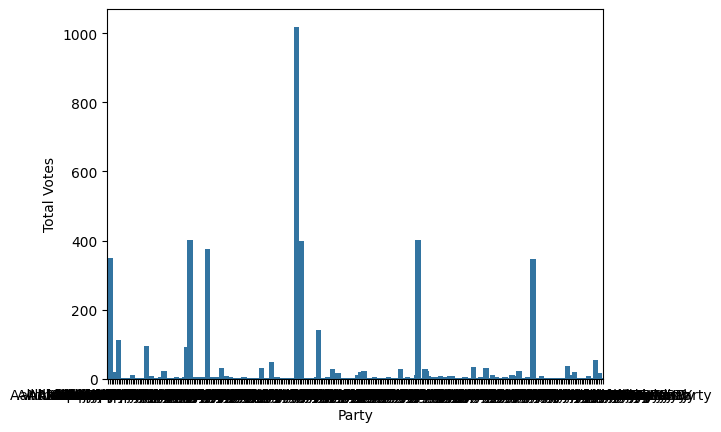

In [22]:
import seaborn as sns
data=df.groupby('Party')['Total Votes'].count()
print(data)

sns.barplot(data, width= 3)

In [30]:
import pandas as pd

df = pd.read_csv("UP_2022.csv")

bjp_sp_df = df[df['Party'].isin(['Bharatiya Janata Party', 'Samajwadi Party'])].copy()

bjp_sp_df.loc[:, 'Total Votes'] = bjp_sp_df['Total Votes'].str.replace(',', '').astype(int)

pivot_df = bjp_sp_df.pivot_table(index='ac_no', columns='Party', values='Total Votes', aggfunc='sum')

pivot_df['Vote_Diff'] = abs(pivot_df['Bharatiya Janata Party'] - pivot_df['Samajwadi Party'])

constituencies_less_than_5000 = pivot_df[pivot_df['Vote_Diff'] < 5000].shape[0]

print("Number of constituencies:", constituencies_less_than_5000)


Number of constituencies: 42


In [32]:
lost_constituencies = (pivot_df['Bharatiya Janata Party'] < pivot_df['Samajwadi Party']).sum()

print("constituencies where the BJP lost:", lost_constituencies)


constituencies where the BJP lost: 104


In [36]:
import pandas as pd

df = pd.read_csv("UP_2022.csv")

df2 = pd.read_csv("UP_AC_District.csv")

df2.rename(columns={'AC No.': 'ac_no'}, inplace=True)

mdf = pd.merge(df, df2, on='ac_no', how='inner')

mdf['Total Votes'] = pd.to_numeric(mdf['Total Votes'], errors='coerce')

district_party_votes = mdf.groupby(['District', 'Party'])['Total Votes'].sum()

district_total_votes = mdf.groupby('District')['Total Votes'].sum()

district_vote_percentage = (district_party_votes / district_total_votes * 100).round(2)

print(district_vote_percentage)



District  Party                         
Agra      Aam Aadmi Party                  NaN
          Aazad Samaj Party (Kanshi Ram)   NaN
          Adarsh Samaj Party               NaN
          Bahujan Mukti Party              NaN
          Bahujan Samaj Party              NaN
                                            ..
Varanasi  Rashtriya Vikas Manch Party      NaN
          Right to Recall Party            NaN
          Samajwadi Party                  NaN
          Sarvjan Sanatan Party            NaN
          Suheldev Bharatiya Samaj Party   NaN
Name: Total Votes, Length: 1474, dtype: float64
